A notebook to demonstrate the use of the analysis functions for lda dictionaries

In [1]:
original_dict_file = 'carnegie_lda.dict'

Load the dictionary

In [5]:
import pickle
with open(original_dict_file,'r') as f:
    lda_dict = pickle.loads(f.read())

In [6]:
print lda_dict.keys()

['phi', 'features', 'doc_metadata', 'alpha', 'K', 'word_index', 'topic_index', 'beta', 'topic_metadata', 'theta', 'corpus', 'overlap_scores', 'doc_index', 'gamma']


User can set some parameters here

In [7]:
overlap_thresh = 0.3
probability_thresh = 0.1

Compute motif degrees

In [25]:
%load_ext autoreload
%autoreload 2
from lda_analysis_functions import compute_motif_degrees
motif_degree_dict,motif_degree_list = compute_motif_degrees(lda_dict,probability_thresh,overlap_thresh)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


print the top 10 motifs by degree

In [26]:
for m,d in motif_degree_list[:10]:
    print m,d

motif_17 370
motif_22 143
motif_26 122
motif_41 122
motif_48 62
motif_30 58
motif_0 55
motif_49 48
motif_44 34
motif_40 28


Print the degree of any motif

In [27]:
motif = 'motif_3'
print motif_degree_dict[motif]

0


Plot a motif

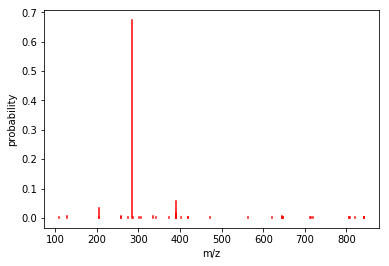

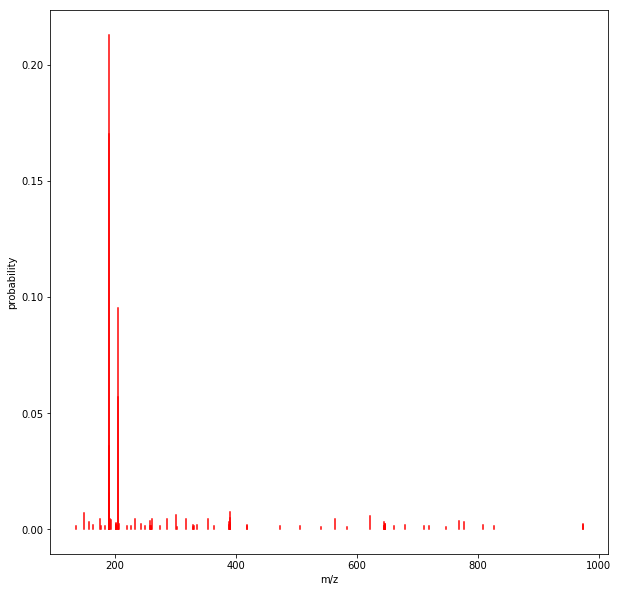

In [35]:
from lda_analysis_functions import plot_motif
import pylab as plt
%matplotlib inline
plot_motif(lda_dict,'motif_22')
plot_motif(lda_dict,'motif_30',figsize=(10,10))

List the available document metadata fields

In [36]:
from lda_analysis_functions import list_metadata_fields
mdf = list_metadata_fields(lda_dict)
print mdf

['name', 'cid', 'precursormass', 'parentrt', 'filename', 'charge', 'parentintensity', 'familyid', 'singlechargeprecursormass', 'parentmass', 'scanno']


In [41]:
from lda_analysis_functions import print_mols
print_mols(lda_dict,['1'])

Spectra name        	precursormass       	parentrt            	
1                   	263.167266846       	300.7858            	


Print all molecules in a particular motif

In [47]:
motif = 'motif_40'
from lda_analysis_functions import get_motif_mols
mols = get_motif_mols(lda_dict,motif,probability_thresh,overlap_thresh)
print_mols(lda_dict,
           mols,
           fields = ['precursormass','parentrt','scanno'])

Spectra name        	precursormass       	parentrt            	scanno              	
344                 	693.455932617       	1331.3871           	2127                	
819                 	587.412536621       	1603.4489           	2451                	
366                 	642.423400879       	1211.7227           	1911                	
806                 	668.617858887       	2129.9214           	3263                	
815                 	406.302642822       	1899.6387           	2930                	
939                 	603.264465332       	653.7846            	1057                	
624                 	357.300079346       	1808.2204           	2781                	
926                 	367.35736084        	1867.3383           	2890                	
916                 	495.36807251        	1653.6678           	2518                	
842                 	278.1456604         	959.4188            	1482                	
606                 	548.354980469       	938.6444            	15

Plot a document

set(['motif_3', 'motif_41', 'motif_40', 'motif_26'])
set(['motif_3', 'motif_41', 'motif_40', 'motif_26'])


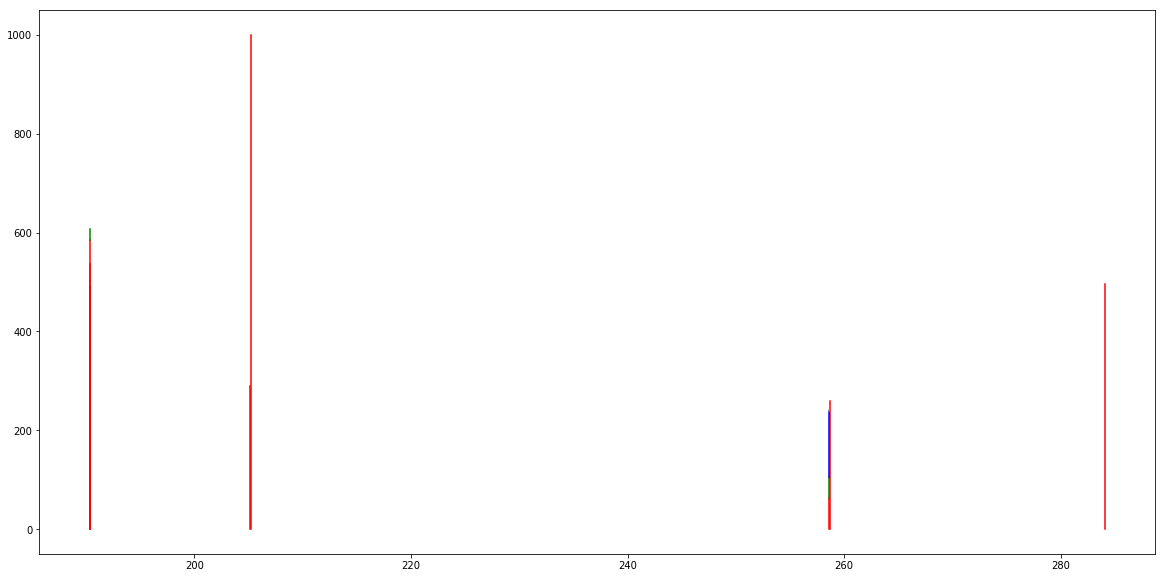

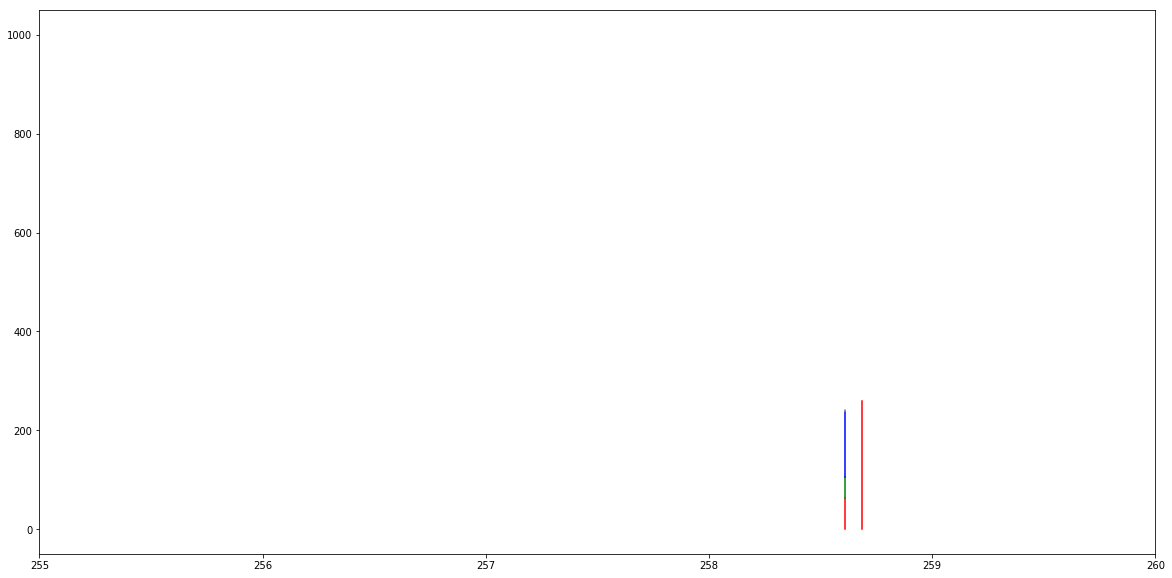

In [81]:
mol = mols[4]
from lda_analysis_functions import plot_mol
plot_mol(lda_dict,mol,color_motifs = True,figsize=(20,10))
# The optional xlim parameter allows us to zoom in
plot_mol(lda_dict,mol,color_motifs = True,xlim = [255,260],figsize=(20,10))

Now for some motif matching

Firstly, load motifdb

In [112]:
motifdb_path = '/Users/simon/git/motifdb/'
import sys,os
sys.path.append(os.path.join(motifdb_path,'code','utilities'))
from motifdb_loader import load_db,MotifFilter
dbs_to_load = ['massbank_binned_005','gnps_binned_005']
db_spectra,db_metadata = load_db(dbs_to_load,motifdb_path+'motifs')
mf = MotifFilter(db_spectra,db_metadata)
db_spectra,db_metadata = mf.filter()

Looking in /Users/simon/git/motifdb/motifs/massbank_binned_005/*.m2m
	 Found 46
Looking in /Users/simon/git/motifdb/motifs/gnps_binned_005/*.m2m
	 Found 78
Found total of 124 motif files
Merging: gnps_motif_11.m2m and mb_motif_13.m2m (1.0)
Merging: gnps_motif_12.m2m and mb_motif_5.m2m (1.0)
Merging: gnps_motif_13.m2m and mb_motif_6.m2m (1.0)
Merging: gnps_motif_14.m2m and mb_motif_7.m2m (0.996808602927)
Merging: gnps_motif_15.m2m and mb_motif_8.m2m (1.0)
Merging: gnps_motif_21.m2m and mb_motif_19.m2m (1.0)
Merging: gnps_motif_3.m2m and mb_motif_0.m2m (1.0)
Merging: gnps_motif_35.m2m and mb_motif_17.m2m (1.0)
Merging: gnps_motif_37.m2m and mb_motif_20.m2m (1.0)
Merging: gnps_motif_38.m2m and gnps_motif_5.m2m (1.0)
Merging: gnps_motif_38.m2m and mb_motif_15.m2m (1.0)
Merging: gnps_motif_38.m2m and mb_motif_2.m2m (1.0)
Merging: gnps_motif_4.m2m and mb_motif_1.m2m (1.0)
Merging: gnps_motif_40.m2m and mb_motif_18.m2m (1.0)
Merging: gnps_motif_42.m2m and mb_motif_21.m2m (1.0)
Merging: gnps_m

In [114]:
from lda_analysis_functions import match_motifs
matches = match_motifs(lda_dict,db_spectra,threshold = 0.00)
print matches

None
